In [ ]:
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')

#  Python, Pandas, and Numpy Assessment

---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

2. Write a function that checks whether a number is prime or not **1 pt.**

3. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**
       
4. Create a 5x5 identity matrix **(1pt)**

5. Create a function that lists the first n prime numbers **(2pts)**

6. Load `data/kpop_music_videos.csv`as a dataframe and answer the following questions:
    - based on the MV dataset, which Kpop group is the most prolific in terms of music video releases? **2pts**
    - which year had the most releases? **3pts**
    - in descending order, find the top 5 months that music videos are typically released *HINT: get the monthly average and compute from there* **5pts**
       
7. Load `data/kpop_idols.csv` as a dataframe and answer the following questions:
    - within the dataset, who is the oldest kpop idol? **1pt**
    - which group, using the mean of the members' ages combined, is the oldest? **2pts**
    - which group, using the mean of the members' ages combined, is the youngest? **2pts**

8. Using the `kpop_idols.csv`and `kpop_music_videos.csv` datasets, answer the following:
    - identify your favorite kpop group **1pt**
    - what is the average age of the members, and show who the eldest and youngest members are **2pts**
    - using Pandas, show a histogram/barplot of the number of music video releases they have per year **5pts**
    


In [ ]:
'''
1. We first remove all spaces in the string s and capitalize each character before checking whether the resulting is a palindrome.
'''

def is_palindrome(s):
  s = s.upper().replace(" ","")
  return s == s[::-1]

In [ ]:
print(is_palindrome("Evil olive"))
print(is_palindrome("star"))

True
False


In [ ]:
'''
2. This is a naive algorithm for primality testing. We limit our variable i only up to the square root of n, 
although we added a plus 1 because the int function tends to round down our argument. This limit is justified
since n can not be equal to the product of two numbers both greater than square root of n.
'''

def is_prime(n):
  if n == 1:
    return False
  elif n == 2 or n == 3:
    return True
  else:
    for i in range(2,int(n**(1/2))+1):
      if n % i == 0:
        return False
  return True

In [ ]:
print(is_prime(1))
print(is_prime(5))
print(is_prime(24))

False
True
False


In [ ]:
'''
3. Here we just use the random.uniform function from Numpy. 
Source: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
'''

def array_from_range(n,a,b):
  return np.random.uniform(low = a,high = b,size = (n,n))

In [ ]:
array_from_range(5,10,3)

array([[5.68128439, 4.31284748, 7.31310995, 8.59429642, 8.44560823],
       [6.99299695, 9.70242834, 6.77839911, 5.01678965, 9.07693617],
       [5.22703898, 7.2931004 , 8.10788144, 7.77249593, 8.91962878],
       [5.22549479, 3.43055322, 5.83439559, 4.22396524, 6.68844372],
       [5.85395871, 8.69504032, 8.3492904 , 9.41686382, 4.26369348]])

In [ ]:
'''
4. Here, we just use Numpy's eye function.
'''

print(np.eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
'''
5. This is a naive algorithm that uses the is_prime function we defined earlier.
'''

def first_n_primes(n):
  primes = []
  i = 1
  while len(primes) < n:
    if is_prime(i):
      primes.append(i)
    i += 1
  return primes

In [ ]:
print(first_n_primes(6))

[2, 3, 5, 7, 11, 13]


In [ ]:
'''
6. We first read the kpop_music_videos file and inspect it using the head function.
'''

music_df = pd.read_csv("kpop_music_videos.csv")
music_df.head(5)

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release
0,2020-05-22,Agust D,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major
1,2020-05-21,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major
2,2020-05-21,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major
3,2020-05-20,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major
4,2020-05-20,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major


In [ ]:
'''
Upon inspecting the data types, we see that the Date column is not yet on our desired type.
'''

music_df.dtypes

Date           object
Artist         object
Song Name      object
Korean Name    object
Director       object
Video          object
Type           object
Release        object
dtype: object

In [ ]:
'''
We use Pandas datetime functions to extract the exact date, month, and year from the Date column.
Source: https://pandas.pydata.org/docs/reference/series.html#datetimelike-properties
'''

music_df["Date"] = pd.to_datetime(music_df["Date"])
music_df["Month"] = music_df["Date"].dt.month_name()
music_df["Year"] = music_df["Date"].dt.year

In [ ]:
'''
To answer a, we need to know whether all artists in the dataset are groups. We see below that some of the artists are solo 
artists, which we need to exclude in this computation.
'''

music_df["Type"].value_counts()

Boy          1970
Girl         1326
Girl Solo     204
Boy Solo      139
Co-ed         128
Co-Ed           4
Special         1
Name: Type, dtype: int64

In [ ]:
'''
We first get all kpop_groups and use the value_counts function to their corresponding counts. Since the value_counts
function also sorts the values in descending order by default, we simply index the resulting series to get our answer.
From this, we see that FTISLAND is the most prolific group in the dataset, with 57 releases.
'''

kpop_groups = music_df[(music_df["Type"] != "Girl Solo") & (music_df["Type"] != "Boy Solo")]
kpop_groups["Artist"].value_counts()[0:1]

FTISLAND    57
Name: Artist, dtype: int64

In [ ]:
'''
We do the same to answer b. Here, we see that 2019 is the year with the most releases, 503 to be exact.
'''

music_df["Year"].value_counts()[0:1]

2019    503
Name: Year, dtype: int64

In [ ]:
'''
To answer c, we just slice up to the 5th element of the value_counts series for the Month column.
'''

music_df["Month"].value_counts()[:5]

July        356
April       352
November    348
January     347
May         338
Name: Month, dtype: int64

In [ ]:
'''
7. We first load the dataset to Pandas and inspect it using the head function.
'''

idols_df = pd.read_csv("kpop_idols.csv")
idols_df.head(5)

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F


In [ ]:
'''
Upon inspecting the data types, we see that the Date of Birth column is once again an object.
'''

idols_df.dtypes

Stage Name       object
Full Name        object
Korean Name      object
K. Stage Name    object
Date of Birth    object
Group            object
Country          object
Birthplace       object
Other Group      object
Gender           object
dtype: object

In [ ]:
'''
We once again use Pandas datetime functions to transform the Date of Birth column and to create an Age column.
'''

idols_df["Date of Birth"] = pd.to_datetime(idols_df["Date of Birth"])
idols_df["Age"] = ((pd.to_datetime("2021-09-23") - idols_df["Date of Birth"]).dt.days) / 365

In [ ]:
'''
To answer a, we first sort the values based on age and index the first row. Here, we see that PSY is the oldest Kpop idol
in this dataset, with an age of almost 44 years old.
'''

idols_df[["Stage Name", "Age"]].sort_values("Age", ascending = False).iloc[0]

Stage Name          PSY
Age           43.758904
Name: 844, dtype: object

In [ ]:
'''
To get the oldest and youngest groups based on mean of age, we used the groupby function and sorted the values by age.
From this, we see that Brown Eyed Girls is the oldest, with a mean age of ~38.43 years, while TEEN TEEN is the youngest
with mean ~17.76.
'''

groups_by_age = idols_df.groupby("Group")["Age"].mean().sort_values(ascending = False)
groups_by_age[0:1]

Group
Brown Eyed Girls    38.439041
Name: Age, dtype: float64

In [ ]:
groups_by_age[-1:]

Group
TEEN TEEN    17.76347
Name: Age, dtype: float64

In [ ]:
'''
8. My favorite KPOP group is ITZY, and so we first isolate all their members in the dataset below and inspect
the resulting dataset.
'''

itzy_df = idols_df[idols_df["Group"] == "ITZY"]
itzy_df

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Age
85,Chaeryeong,Lee Chaeryeong,이채령,채령,2001-07-05,ITZY,South Korea,NaN,NaN,F,20.232877
702,Lia,Choi Jisu,최지수,리아,2000-07-21,ITZY,South Korea,NaN,NaN,F,21.189041
877,Ryujin,Shin Ryujin,신류진,류진,2001-04-17,ITZY,South Korea,NaN,NaN,F,20.449315
1183,Yeji,Hwang Yeji,황예지,예지,2000-05-26,ITZY,South Korea,NaN,NaN,F,21.342466
1283,Yuna,Shin Yuna,신유나,유나,2003-12-09,ITZY,South Korea,NaN,NaN,F,17.802740


In [ ]:
'''
To answer b, we first get the mean of members' ages.
'''

itzy_df["Age"].mean()

20.20328767123288

In [ ]:
'''
We then sorted the rows based on the Age column and printed the eldest (which is Yeji) and the youngest (which is Yuna) members.
'''

members_by_age = itzy_df.sort_values("Date of Birth")
members_by_age[["Stage Name", "Age"]].iloc[0]


Stage Name         Yeji
Age           21.342466
Name: 1183, dtype: object

In [ ]:
members_by_age[["Stage Name", "Age"]].iloc[-1]

Stage Name        Yuna
Age           17.80274
Name: 1283, dtype: object

In [ ]:
'''
To answer c, we first isolate all ITZY releases in the dataframe below and inspect it afterwards.
'''

itzy_releases = music_df[music_df["Artist"] == "ITZY"]
itzy_releases

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release,Month,Year
82,2020-03-09,ITZY,Wannabe,NaN,Naive,https://youtu.be/fE2h3lGlOsk,Girl,Major,March,2020
363,2019-07-28,ITZY,ICY,아이씨,NaN,https://youtu.be/zndvqTc4P9I,Girl,Major,July,2019
617,2019-02-10,ITZY,DALLA DALLA,달라달라,Naive,https://youtu.be/pNfTK39k55U,Girl,Major,February,2019


<AxesSubplot:>

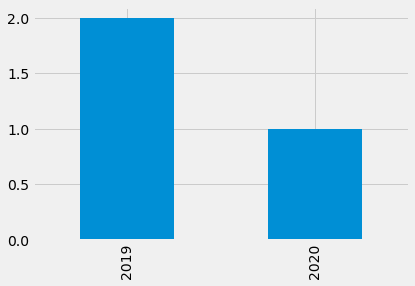

In [ ]:
'''
Finally, we then plot the value_counts series for the Year column.
'''

itzy_releases_by_year = itzy_releases["Year"].value_counts()
itzy_releases_by_year.plot(kind = "bar")